In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.num_examples

55000

In [4]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [6]:
w1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(X,w1) + b1)

In [7]:
w2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2) + b2)

In [8]:
w3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(l2,w3) + b3

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
training_epochs = 15
batch_size = 100

In [12]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0001 cost = 173.449924760
Epoch: 0002 cost = 40.592775145
Epoch: 0003 cost = 25.058551833
Epoch: 0004 cost = 17.458076730
Epoch: 0005 cost = 12.631593295
Epoch: 0006 cost = 9.406275049
Epoch: 0007 cost = 7.052375541
Epoch: 0008 cost = 5.317442938
Epoch: 0009 cost = 3.941038866
Epoch: 0010 cost = 2.925057447
Epoch: 0011 cost = 2.160353158
Epoch: 0012 cost = 1.638387936
Epoch: 0013 cost = 1.251705657
Epoch: 0014 cost = 0.986203943
Epoch: 0015 cost = 0.817842486
Learning Finished!
Accuracy:  0.943
Label: [7]
Prediction: [7]


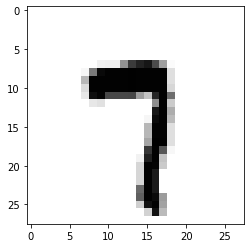

In [15]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X: batch_xs, Y: batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch

        print("Epoch:", "%04d" % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))
 
    print("Learning Finished!")
 
    print("Accuracy: ", accuracy.eval(session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: mnist.test.images[r:r + 1]}))
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()